# Face Detection
---

## Set Up

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
denis = cv2.imread('../DATA/Denis_Mukwege.jpg', 0)
nadia = cv2.imread('../DATA/Nadia_Murad.jpg', 0)
solvay = cv2.imread('../DATA/solvay_conference.jpg', 0)

# Classification

In [3]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255,255,255), 10)

    return face_img

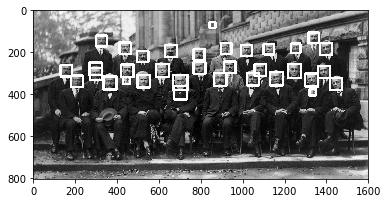

In [4]:
result = detect_face(solvay)
plt.imshow(result, cmap="gray")

In [5]:
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255,0,0), 10)

    return face_img

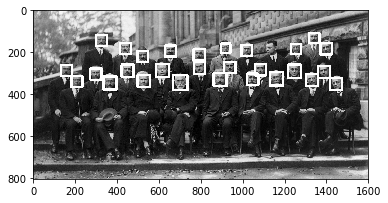

In [6]:
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap="gray")

In [7]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')
def detect_eye(img):
    eye_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(eye_img)

    for (x, y, w, h) in eye_rects:
        cv2.rectangle(eye_img, (x, y), (x+w, y+h), (0,255,0), 10)

    return eye_img

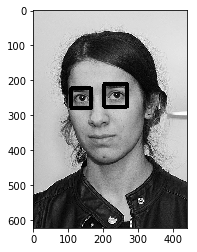

In [8]:
result = detect_eye(nadia)
plt.imshow(result, cmap="gray")

In [9]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    # frame = detect_eye(frame)
    cv2.imshow("frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()